In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data2.txt'
data = pd.read_csv(path,names=['x1','x2','y'])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


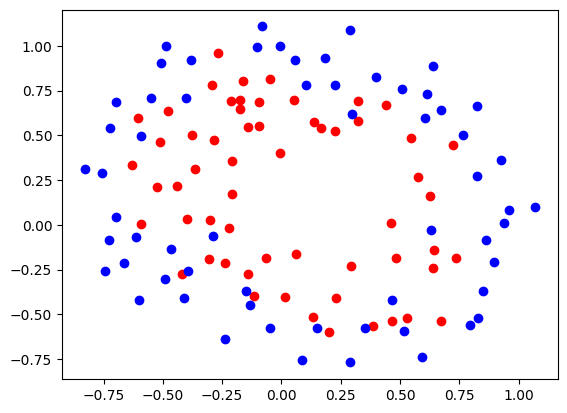

In [3]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
plt.scatter(positive['x1'],positive['x2'],c='r')
plt.scatter(negative['x1'],negative['x2'],c='b')
plt.show()

In [4]:
def make_feature(x1,x2,power):
    data = {}
    for i in range(0,power+1):
        for j in range(0,i+1):
            data['F{}{}'.format(j,i-j)] = np.power(x1,j) * np.power(x2,i-j)
    return pd.DataFrame(data)

In [5]:
x1 = data['x1']
x2 = data['x2']
data_new = make_feature(x1,x2,6)

In [6]:
data_new.head()

,F00,F01,F10,F02,F11,F20,F03,F12,F21,F30,...,F32,F41,F50,F06,F15,F24,F33,F42,F51,F60
0,1.0,0.69956,0.051267,0.489384,0.035864,0.002628,0.342354,0.025089,0.001839,0.000135,...,0.000066,0.000005,3.541519e-07,0.117206,0.008589,0.000629,0.000046,0.000003,2.477505e-07,1.815630e-08
1,1.0,0.68494,-0.092742,0.469143,-0.063523,0.008601,0.321335,-0.043509,0.005891,-0.000798,...,-0.000374,0.000051,-6.860919e-06,0.103256,-0.013981,0.001893,-0.000256,0.000035,-4.699318e-06,6.362953e-07
2,1.0,0.69225,-0.213710,0.479210,-0.147941,0.045672,0.331733,-0.102412,0.031616,-0.009761,...,-0.004677,0.001444,-4.457837e-04,0.110047,-0.033973,0.010488,-0.003238,0.001000,-3.085938e-04,9.526844e-05
3,1.0,0.50219,-0.375000,0.252195,-0.188321,0.140625,0.126650,-0.094573,0.070620,-0.052734,...,-0.013299,0.009931,-7.415771e-03,0.016040,-0.011978,0.008944,-0.006679,0.004987,-3.724126e-03,2.780914e-03
4,1.0,0.46564,-0.513250,0.216821,-0.238990,0.263426,0.100960,-0.111283,0.122661,-0.135203,...,-0.029315,0.032312,-3.561597e-02,0.010193,-0.011235,0.012384,-0.013650,0.015046,-1.658422e-02,1.827990e-02


In [7]:
X = data_new.values
Y = data.iloc[:,2:].values
w = np.matrix(np.zeros(X.shape[1]))
w = np.float64(w)
w

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
def sigmoid(X):
    return 1 / (np.exp(-X) + 1)

In [9]:
def cost(X,Y,w,lamda):
    first = -Y * np.log(sigmoid(X@w.T-Y))
    second = -(1-Y) * np.log(1-sigmoid(X@w.T-Y))
    reg = np.sum(np.power(w[0,1:]),2) * lamda / (2 * len(X))
    return (first +second)/len(X) + reg

In [10]:
error = sigmoid(X@w.T)
print(type(error))

<class 'numpy.matrix'>


In [11]:
def gradient_descent(X,Y,w,lr,iter,lamda):
    for i in range(iter):
        
        reg = lr * lamda * w[0,1:] /len(X)
        
        reg = np.insert(reg,0,0,axis=1)
        
        error = sigmoid(X@w.T) - Y
        
        tem = X.T@error
        
        w = w - tem.T * lr / len(X) - reg
        
        
    return w

In [12]:
w = gradient_descent(X,Y,w,0.001,200000,0.001)


In [13]:
data_new.min()

F00    1.000000e+00
F01   -7.697400e-01
F10   -8.300700e-01
F02    2.618369e-05
F11   -4.840964e-01
F20    4.014996e-05
F03   -4.560707e-01
F12   -4.837430e-01
F21   -3.581209e-01
F30   -5.719317e-01
F04    6.855856e-10
F13   -4.833898e-01
F22    6.419177e-06
F31   -2.968536e-01
F40    1.612020e-09
F05   -2.702217e-01
F14   -4.830370e-01
F23   -1.426605e-01
F32   -1.592528e-01
F41   -2.460679e-01
F50   -3.940702e-01
F06    1.795116e-14
F15   -4.826843e-01
F24    2.418097e-10
F33   -1.134476e-01
F42    2.577297e-10
F51   -2.039706e-01
F60    6.472253e-14
dtype: float64